In [1]:
import numpy as np
import re
import os
os.getcwd()

'/Users/ritikaagarwal/Documents/Practice '

In [2]:
import pdfplumber
pdf = pdfplumber.open("Trading_Sample.pdf")
p0 = pdf.pages[0]
print(p0.extract_text)


<bound method Page.extract_text of <pdfplumber.page.Page object at 0x10fbe5b00>>


In [3]:
im = p0.to_image()
print(im)

In [4]:
# Extract the text from the PDF
text = p0.extract_text()
print(text)

Minimum	Volume	
Min	volume	that	must	be	traded	
	 House	 Account		 Trader	
DEFAULT	 	 	 	
Meta	Marked	Test	 AUD	0.00	 AUD	0.00	 AUD	0.00	
	
	
Minimum	Trade	Value	
Minimum	required	value	of	the	entity	trading	
	 House	 Account		 Trader	
DEFAULT	 	 	 	
Meta	Marked	Test	 AUD	0.00	 AUD	0.00	 AUD	0.00	
	


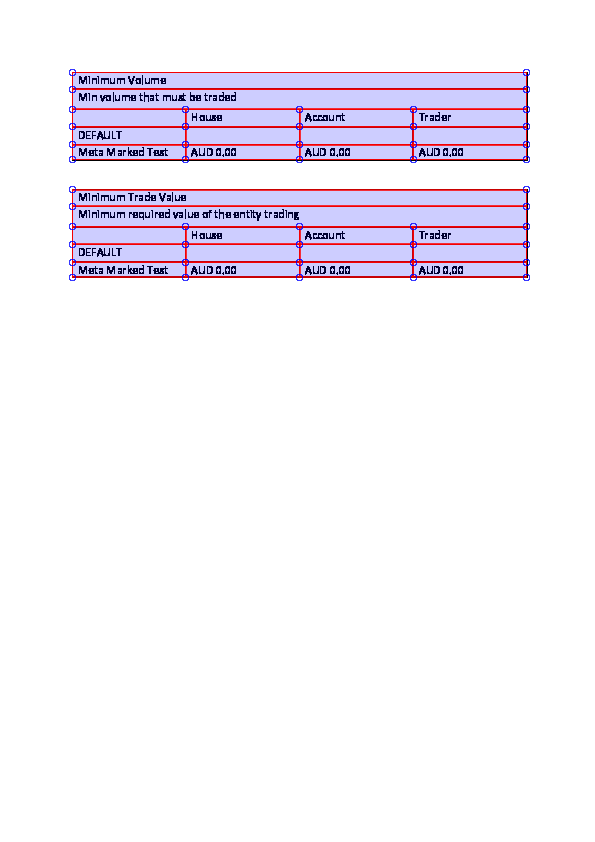

In [5]:
im.reset().debug_tablefinder()

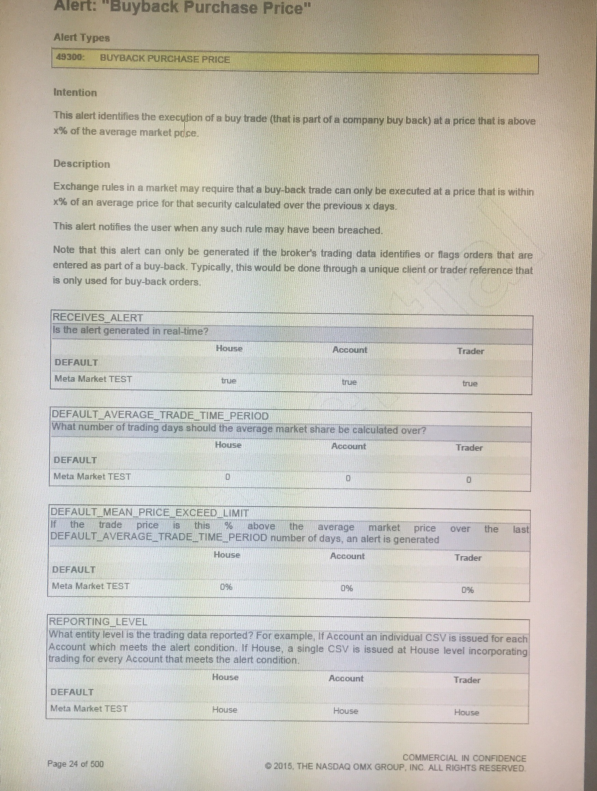

In [32]:
im.reset().draw_rects(p0.chars)

In [7]:
table_settings = {
    "vertical_strategy": "lines",
    "horizontal_strategy": "text",
    "intersection_x_tolerance": 15
}

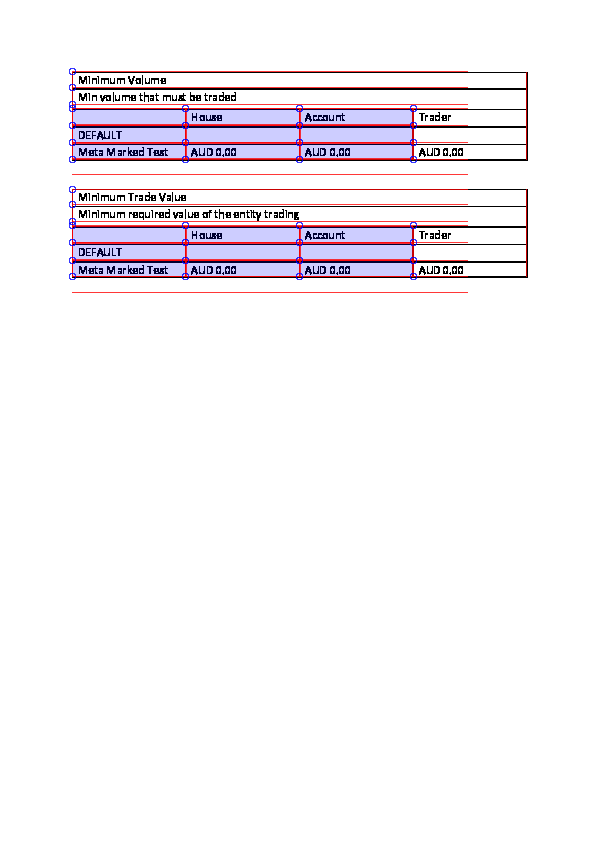

In [8]:
im.reset().debug_tablefinder(table_settings)

In [9]:
table = p0.extract_table()
print(table)

[['Minimum\tVolume', None, None, None], ['Min\tvolume\tthat\tmust\tbe\ttraded', None, None, None], ['', 'House', 'Account', 'Trader'], ['DEFAULT', '', '', ''], ['Meta\tMarked\tTest', 'AUD\t0.00', 'AUD\t0.00', 'AUD\t0.00']]


In [10]:
import pandas as pd
df = pd.DataFrame(table)

In [11]:
print(df)

                                     0          1          2          3
0                      Minimum\tVolume       None       None       None
1  Min\tvolume\tthat\tmust\tbe\ttraded       None       None       None
2                                           House    Account     Trader
3                              DEFAULT                                 
4                   Meta\tMarked\tTest  AUD\t0.00  AUD\t0.00  AUD\t0.00


In [116]:
df.columns = df.columns.str.replace("  ","")
print(df)
df.strip()

                        Minimum_Volume        NaN        NaN        NaN
0  Min\tvolume\tthat\tmust\tbe\ttraded       None       None       None
1                                           House    Account     Trader
2                              DEFAULT                                 
3                   Meta\tMarked\tTest  AUD\t0.00  AUD\t0.00  AUD\t0.00


AttributeError: 'DataFrame' object has no attribute 'strip'

In [13]:
print(df.columns[0])
print(df.iloc[1:,1:])
print(df.T)
print(df.T.iloc[:,2:])

0
         1        2        3
1     None     None     None
2    House  Account   Trader
3                           
4  AUD0.00  AUD0.00  AUD0.00
               0                          1        2        3               4
0  MinimumVolume  Minvolumethatmustbetraded           DEFAULT  MetaMarkedTest
1           None                       None    House                  AUD0.00
2           None                       None  Account                  AUD0.00
3           None                       None   Trader                  AUD0.00
         2        3               4
0           DEFAULT  MetaMarkedTest
1    House                  AUD0.00
2  Account                  AUD0.00
3   Trader                  AUD0.00


In [12]:

df=df.replace(r'[,\"\']','', regex=True).replace(r'\s*([^\s]+)\s*', r'\1', regex=True)
print(df)

                           0        1        2        3
0              MinimumVolume     None     None     None
1  Minvolumethatmustbetraded     None     None     None
2                               House  Account   Trader
3                    DEFAULT                           
4             MetaMarkedTest  AUD0.00  AUD0.00  AUD0.00


In [14]:
print(df.T.iloc[:,1:])
print("Paramter Name")
print(df.columns[0])

                           1        2        3               4
0  Minvolumethatmustbetraded           DEFAULT  MetaMarkedTest
1                       None    House                  AUD0.00
2                       None  Account                  AUD0.00
3                       None   Trader                  AUD0.00
Paramter Name
0


In [18]:
columns_names =["Exchange_Name","Model_Name","Parameter_Name","Entity_Type","Security_Type","Threshold_value"]
new_df = pd.DataFrame(columns=columns_names)
print(new_df)

Empty DataFrame
Columns: [Exchange_Name, Model_Name, Parameter_Name, Entity_Type, Security_Type, Threshold_value]
Index: []


In [36]:

print(new_df.columns)
print(new_df)

new_df['Entity_Type']= df.T.iloc[:,2]
new_df['Threshold_Value']= df.T.iloc[:,4]


Index(['Exchange_Name', 'Model_Name', 'Parameter_Name', 'Entity_Type',
       'Security_Type', 'Threshold_value', 'Threshold_Value'],
      dtype='object')
  Exchange_Name Model_Name Parameter_Name Entity_Type Security_Type  \
0           NaN        NaN            NaN                       NaN   
1           NaN        NaN            NaN       House           NaN   
2           NaN        NaN            NaN     Account           NaN   
3           NaN        NaN            NaN      Trader           NaN   

  Threshold_value Threshold_Value  
0             NaN  MetaMarkedTest  
1             NaN         AUD0.00  
2             NaN         AUD0.00  
3             NaN         AUD0.00  


In [40]:
new_df.drop('Threshold_value',axis=1)

,Exchange_Name,Model_Name,Parameter_Name,Entity_Type,Security_Type,Threshold_Value
0,NaN,NaN,NaN,,NaN,MetaMarkedTest
1,NaN,NaN,NaN,House,NaN,AUD0.00
2,NaN,NaN,NaN,Account,NaN,AUD0.00
3,NaN,NaN,NaN,Trader,NaN,AUD0.00


In [42]:
writer = pd.ExcelWriter('output.xlsx')
new_df.to_excel(writer,'Sheet1')
writer.save()

In [2]:
from tabula import read_pdf
from tabula import convert_into
#tab_df = read_pdf("etf_brochure1.pdf",pages="1-2")

new_ss= read_pdf("Trading_Sample.pdf",pages="1",output_format="json")
print(new_ss)
#print(tab_df.loc[[:,5]])
# convert_into("etf_brochure1.pdf","test.json",output_format="json")
# !cat test.json
convert_into("Trading_Sample.pdf","ts.csv",output_format="csv")
#!cat test.csv




[{'extraction_method': 'stream', 'top': 0.0, 'left': 0.0, 'width': 464.58001708984375, 'height': 156.47999572753906, 'data': [[{'top': 76.0, 'left': 77.76, 'width': 88.02000427246094, 'height': 8.0, 'text': 'Minimum Volume'}, {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''}, {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''}], [{'top': 92.8, 'left': 77.76, 'width': 158.75, 'height': 8.0, 'text': 'Min volume that must be traded'}, {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''}, {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''}], [{'top': 113.2, 'left': 191.28, 'width': 32.68797302246094, 'height': 8.0, 'text': 'House'}, {'top': 113.2, 'left': 304.8, 'width': 41.69354248046875, 'height': 8.0, 'text': 'Account'}, {'top': 113.2, 'left': 418.56, 'width': 32.239986419677734, 'height': 8.0, 'text': 'Trader'}], [{'top': 130.72, 'left': 77.76, 'width': 44.27000045776367, 'height': 8.0, 'text': 'DEFAULT'}, {'top': 0.0, 'left'

In [5]:

new_ex= read_pdf("Trading_Sample.pdf",pages="all")
print(new_ex)



                                 Minimum Volume Unnamed: 1 Unnamed: 2
0                Min volume that must be traded        NaN        NaN
1                                         House    Account     Trader
2                                       DEFAULT        NaN        NaN
3                     Meta Marked Test AUD 0.00   AUD 0.00   AUD 0.00
4                           Minimum Trade Value        NaN        NaN
5  Minimum required value of the entity trading        NaN        NaN
6                                         House    Account     Trader
7                                       DEFAULT        NaN        NaN
8                     Meta Marked Test AUD 0.00   AUD 0.00   AUD 0.00
